In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
df=pd.read_csv('train.csv')
df

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160
...,...,...,...,...
15825,1429756073,44,False,53.624115
15826,1429756373,45,False,59.752296
15827,1429756673,48,False,52.147630
15828,1429756973,26,False,58.007545


In [3]:
df1=pd.read_csv('test.csv')

In [4]:
df['timestamp'].isnull().sum()

0

In [5]:
df['value'].isnull().sum()

0

In [6]:
df['predicted'].isnull().sum()

0

In [7]:
df['is_anomaly'].isnull().sum()

0

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [9]:
df['is_anomaly']=label_encoder.fit_transform(df['is_anomaly'])

In [10]:
df['is_anomaly'].value_counts()

0    15054
1      776
Name: is_anomaly, dtype: int64

In [11]:
df.describe()

,timestamp,value,is_anomaly,predicted
count,1.583000e+04,15830.000000,15830.000000,15830.000000
mean,1.427383e+09,85.572205,0.049021,71.870715
std,1.370962e+06,321.760918,0.215918,92.450520
min,1.425009e+09,0.000000,0.000000,-281.389070
25%,1.426196e+09,29.000000,0.000000,32.919171
50%,1.427383e+09,47.000000,0.000000,49.771124
75%,1.428570e+09,76.000000,0.000000,75.948052
max,1.429757e+09,13479.000000,1.000000,2716.127200


In [12]:
A=df
A=A.drop(columns=['is_anomaly'])
A

,timestamp,value,predicted
0,1425008573,42,44.072500
1,1425008873,41,50.709390
2,1425009173,41,81.405120
3,1425009473,61,39.950367
4,1425009773,44,35.350160
...,...,...,...
15825,1429756073,44,53.624115
15826,1429756373,45,59.752296
15827,1429756673,48,52.147630
15828,1429756973,26,58.007545


In [13]:
pd.read_csv('test.csv')

,timestamp,value,predicted
0,1396332000,20.00000,20.000000
1,1396332300,20.00000,20.000000
2,1396332600,20.00000,20.000000
3,1396332900,20.00000,20.000000
4,1396333200,20.00000,20.000000
...,...,...,...
3955,1397518500,20.00384,19.836240
3956,1397518800,20.00384,19.207998
3957,1397519100,20.00384,20.103437
3958,1397519400,20.00384,19.346764


In [14]:
pd.read_csv('Submission.csv')

,timestamp,is_anomaly
0,1425008573,False
1,1425008873,False
2,1425009173,False
3,1425009473,False
4,1425009773,False
...,...,...
15825,1429756073,False
15826,1429756373,False
15827,1429756673,False
15828,1429756973,False


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

In [16]:
X=A
y=df['is_anomaly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred_1=accuracy_score(y_test,y_pred)*100
print('\ndf1 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))




df1 : 97.37839545167404 
 [[2978   19]
 [  64  105]] 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2997
           1       0.85      0.62      0.72       169

    accuracy                           0.97      3166
   macro avg       0.91      0.81      0.85      3166
weighted avg       0.97      0.97      0.97      3166



# LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [19]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
y_pred_2= accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1: ',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df1:  96.24131396083386 
 [[2984   13]
 [ 106   63]] 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2997
           1       0.83      0.37      0.51       169

    accuracy                           0.96      3166
   macro avg       0.90      0.68      0.75      3166
weighted avg       0.96      0.96      0.96      3166



# naive bayes 

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [21]:
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
y_pred_3 = accuracy_score(y_test, predictions)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 94.56727732154138 
 [[2944   53]
 [ 119   50]] 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2997
           1       0.49      0.30      0.37       169

    accuracy                           0.95      3166
   macro avg       0.72      0.64      0.67      3166
weighted avg       0.94      0.95      0.94      3166



# DecisionTree

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
y_pred_4 =accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 96.43082754264056 
 [[2951   46]
 [  67  102]] 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2997
           1       0.69      0.60      0.64       169

    accuracy                           0.96      3166
   macro avg       0.83      0.79      0.81      3166
weighted avg       0.96      0.96      0.96      3166



# RandomForest

In [24]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [25]:
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
y_pred_5 = accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 97.12571067593177 
 [[2976   21]
 [  70   99]] 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2997
           1       0.82      0.59      0.69       169

    accuracy                           0.97      3166
   macro avg       0.90      0.79      0.84      3166
weighted avg       0.97      0.97      0.97      3166



# AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
y_pred_6= accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print(f"df1: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df1: 96.62 
 [[2989    8]
 [  99   70]] 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2997
           1       0.90      0.41      0.57       169

    accuracy                           0.97      3166
   macro avg       0.93      0.71      0.77      3166
weighted avg       0.96      0.97      0.96      3166



 # SVM Linear

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [29]:
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
y_pred_7=  accuracy_score(y_test,linear_1)
linear_2 = accuracy_score(y_test,linear_1)
print(" df1 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))

 df1 linear: 96.02021478205938 
 [[2987   10]
 [ 116   53]] 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2997
           1       0.84      0.31      0.46       169

    accuracy                           0.96      3166
   macro avg       0.90      0.66      0.72      3166
weighted avg       0.96      0.96      0.95      3166



# SVM RBF

In [30]:

rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
y_pred_8=accuracy_score(y_test, rbf_1)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df1 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df1 RBF: 96.65192672141504 
 [[2993    4]
 [ 102   67]] 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2997
           1       0.94      0.40      0.56       169

    accuracy                           0.97      3166
   macro avg       0.96      0.70      0.77      3166
weighted avg       0.97      0.97      0.96      3166



# SVM SIGMOID

In [31]:

sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
y_pred_9= accuracy_score(y_test, sigmoid_1)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df1 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

 df1 Sigmoid:  93.39861023373342 
 [[2901   96]
 [ 113   56]] 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      2997
           1       0.37      0.33      0.35       169

    accuracy                           0.93      3166
   macro avg       0.67      0.65      0.66      3166
weighted avg       0.93      0.93      0.93      3166



# SVM ploynomial

96.27289955780164
degree= 2
Polynomial  96.27289955780164

 df1 : [[2993    4]
 [ 121   48]] 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2997
           1       0.92      0.28      0.43       169

    accuracy                           0.96      3166
   macro avg       0.94      0.64      0.71      3166
weighted avg       0.96      0.96      0.95      3166



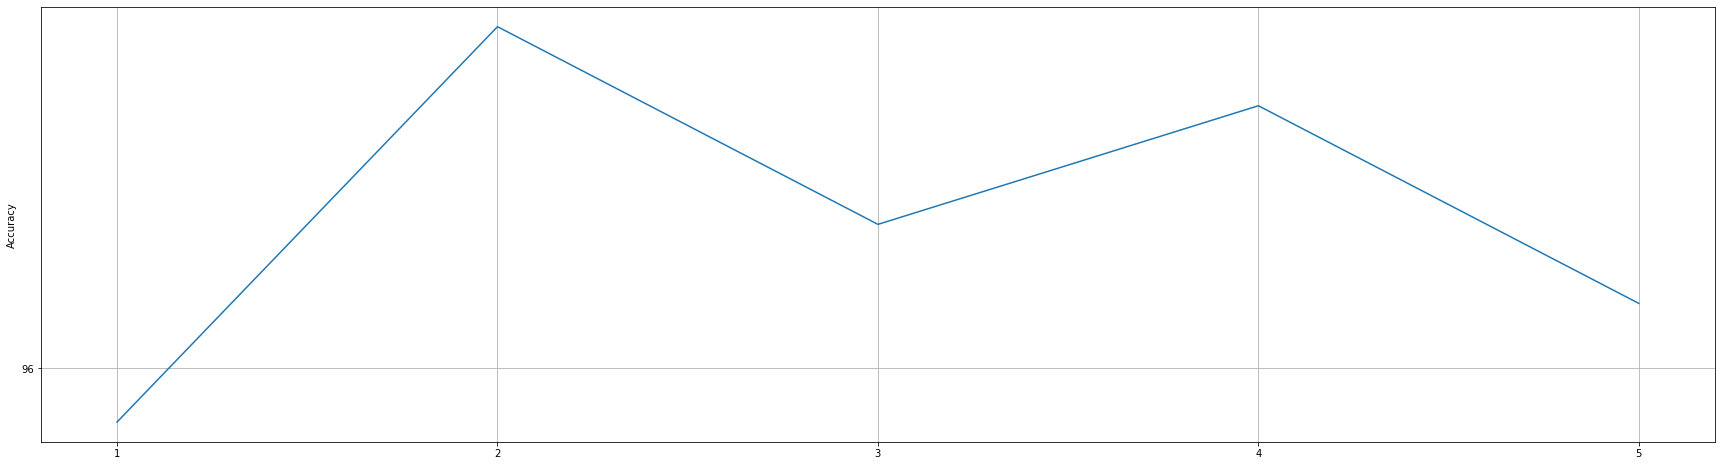

In [32]:
scores=[]

a=[]
n=5
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
y_pred_10=a[degree]
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 41,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df1 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# List of predicted probabilities for each model
y_predict_all =[y_pred_1,y_pred_2*100,y_pred_3*100,y_pred_4*100,y_pred_5*100,y_pred_6*100,y_pred_7*100,y_pred_8*100,y_pred_9*100,y_pred_10]

# Plot ROC curves for each model
plt.figure(figsize=(10,6 ))
model_all=['KNN','LR','NB','DT','RF','ADABOOST','SVN-LINEAR','SVM-RBF','SVM-SIGMOID','SVM-POLY']

<Figure size 720x432 with 0 Axes>

In [34]:
y_predict_all

[97.37839545167404,
 96.24131396083386,
 94.56727732154138,
 96.43082754264056,
 97.12571067593177,
 96.62034112444725,
 96.02021478205938,
 96.65192672141504,
 93.39861023373342,
 96.27289955780164]

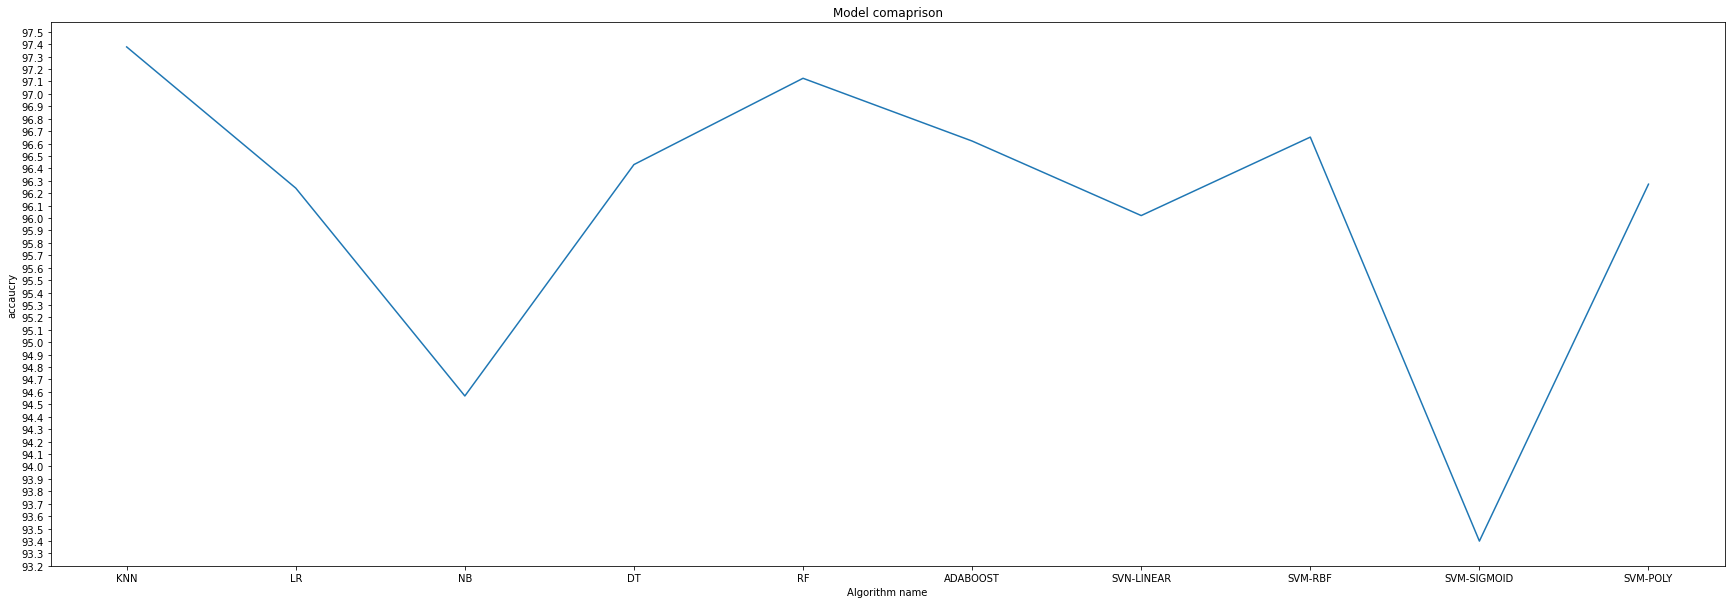

In [35]:
plt.figure(figsize=(30,10))


plt.xlabel('Algorithm name')
plt.ylabel('accaucry')
plt.title('Model comaprison')
plt.yticks(np.arange(0, 101,0.1)) 
plt.plot(model_all,y_predict_all )
plt.show()

Text(0.5, 1.0, 'Model comaprison')

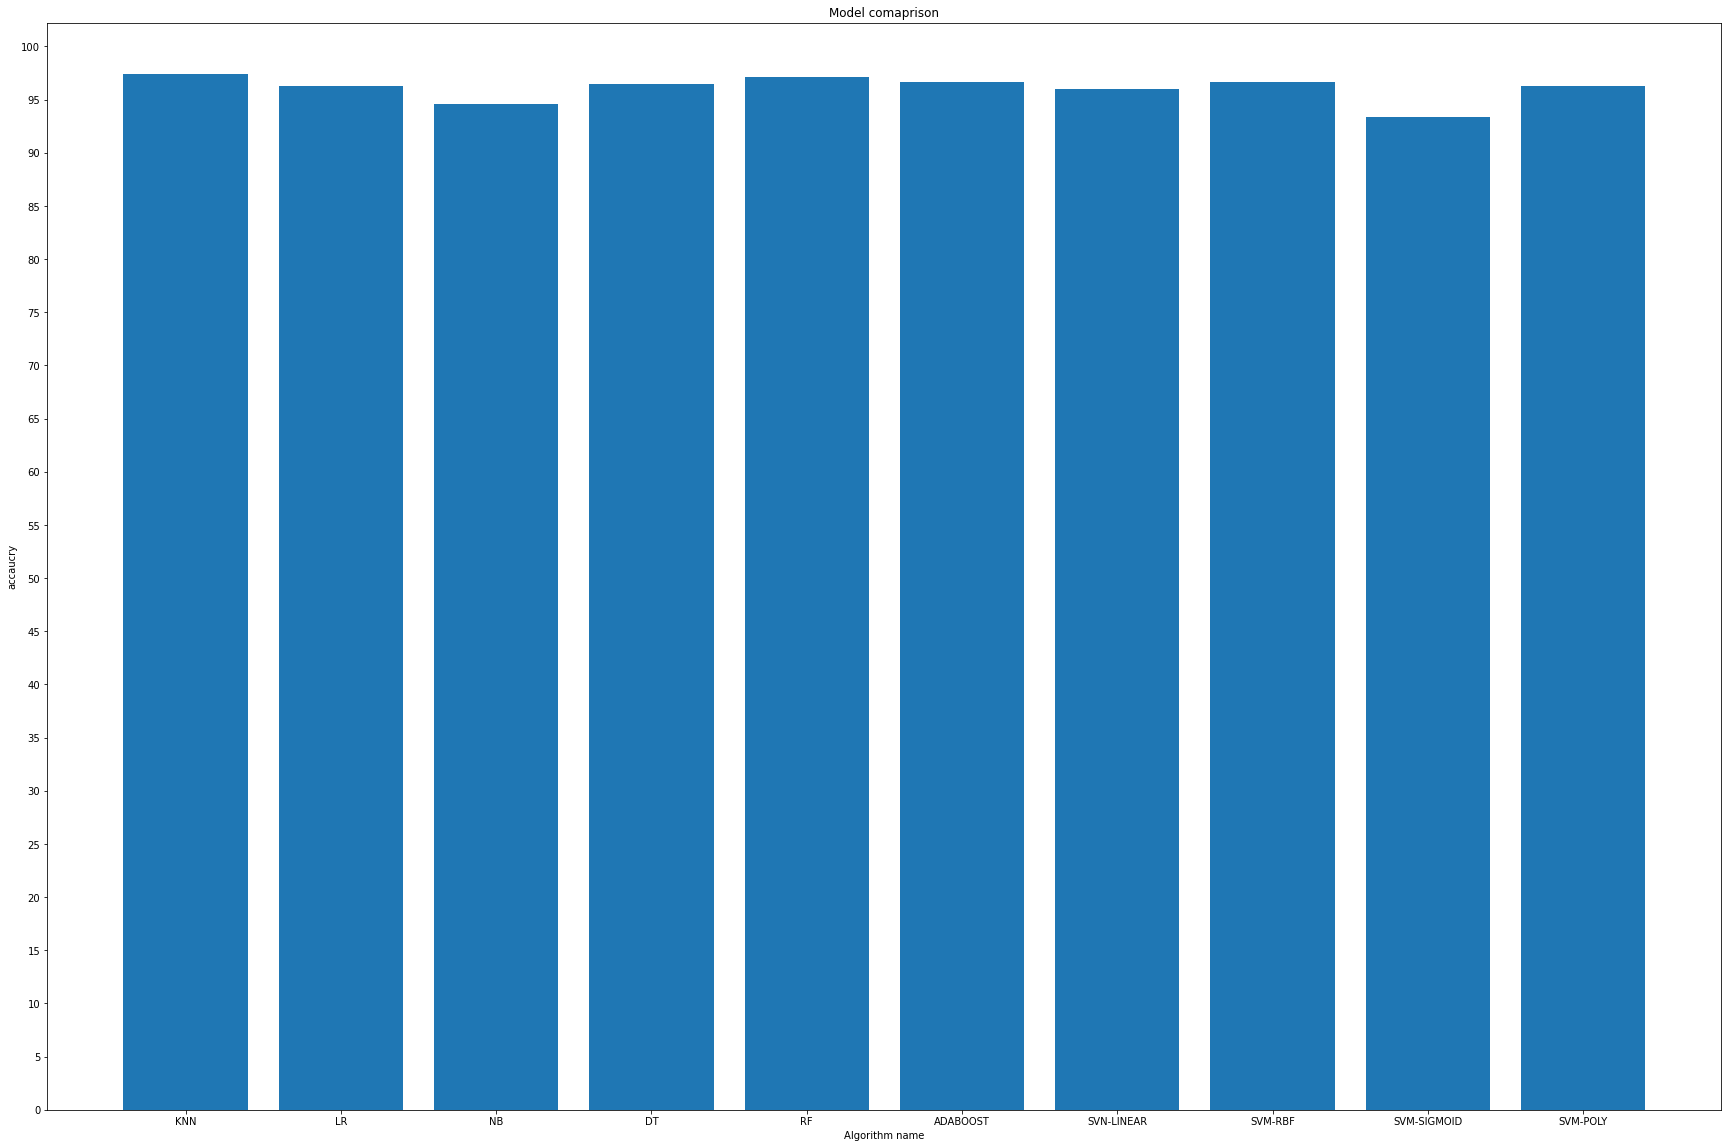

In [36]:
plt.figure(figsize=(30,20))
plt.yticks(np.arange(0, 101, step=5))
plt.bar(model_all,y_predict_all )
plt.xlabel('Algorithm name')
plt.ylabel('accaucry')
plt.title('Model comaprison')


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

In [38]:
X_train=A
X_test=pd.read_csv('test.csv')
y_train=df['is_anomaly']
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred
print(y_pred)

[0 0 0 ... 0 0 0]


In [39]:
l=[]
l=list(y_pred)

In [40]:
l

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


# I get higest accuarcy of 97.37839545167404 with help of knn algorithm
